Mean MSE: Leave one out 2.1030, 10 folds 2.2889, 5 folds 2.2945, 3 folds 2.4067, 2 folds 5114.1112
Mean MSE: Leave one out 1.6324, 10 folds 1.8486, 5 folds 1.8453, 3 folds 2.0361, 2 folds 4.8128
Mean MSE: Leave one out 1.7339, 10 folds 2.0126, 5 folds 2.0264, 3 folds 2.1655, 2 folds 21.0286
Mean MSE: Leave one out 1.4479, 10 folds 1.5914, 5 folds 1.5936, 3 folds 1.5854, 2 folds 1.3943
Mean MSE: Leave one out 1.5180, 10 folds 1.7322, 5 folds 1.7121, 3 folds 1.8151, 2 folds 1.9284


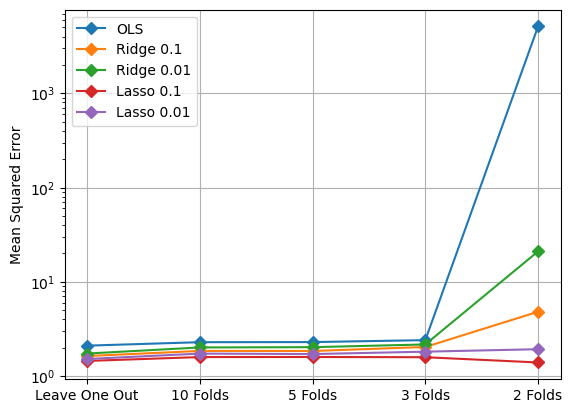

<Figure size 960x720 with 0 Axes>

In [63]:
from numpy import empty, mean
from numpy.random import seed, uniform, normal
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 5
seed(5)

def Runge(x):
    return 1 / (1 + 25 * x**2)

VARIANCE = 1
N_POINTS = 50

x = uniform(-3, 3, N_POINTS)
y = Runge(x) + normal(0, VARIANCE, N_POINTS)
pol = PolynomialFeatures(degree=10)


def cross_validation(k_folds, optimization_method):
    mean_mse = 0.
    for k in range(k_folds):
        train_idx = [i for i in range(N_POINTS) if i%k_folds!=k]
        test_idx = [i for i in range(N_POINTS) if i%k_folds==k]
        
        x_train = x[train_idx]
        y_train = y[train_idx]

        x_test = x[test_idx]
        y_test = y[test_idx]

        X = pol.fit_transform(x_train.reshape(-1, 1))

        scalar = StandardScaler()
        X = scalar.fit_transform(X)
        y_mean = y_train.mean()
        y_train -= y_mean
        y_train -= y_mean

        reg = optimization_method.fit(X, y_train)

        y_pred = reg.predict(scalar.transform(pol.transform(x_test.reshape(-1, 1))))

        mse = mean_squared_error(y_test, y_pred)

        mean_mse += mse / k_folds

    return mean_mse


for optimization_method, name in [
        (LinearRegression(), "OLS"),
        (Ridge(alpha=0.1), "Ridge 0.1"),
        (Ridge(alpha=0.01), "Ridge 0.01"),
        (Lasso(alpha=0.1), "Lasso 0.1"),
        (Lasso(alpha=0.01), "Lasso 0.01")
    ]:

    mean_mse_LEAVE_ONE_OUT = cross_validation(N_POINTS, optimization_method)
    mean_mse_10_FOLDS = cross_validation(10, optimization_method)
    mean_mse_5_FOLDS = cross_validation(5, optimization_method)
    mean_mse_3_FOLDS = cross_validation(3, optimization_method)
    mean_mse_2_FOLDS = cross_validation(2, optimization_method)

    scalar = StandardScaler()
    X = pol.fit_transform(x.reshape(-1, 1))
    X = scalar.fit_transform(X)
    y_center = y - y.mean()

    reg = optimization_method.fit(X, y_center)
    y_pred = reg.predict(scalar.transform(pol.transform(x.reshape(-1, 1)))) + y.mean()

    print(f"Mean MSE: Leave one out {mean_mse_LEAVE_ONE_OUT:.4f}, 10 folds {mean_mse_10_FOLDS:.4f}, 5 folds {mean_mse_5_FOLDS:.4f}, 3 folds {mean_mse_3_FOLDS:.4f}, 2 folds {mean_mse_2_FOLDS:.4f}")
    plt.plot(range(5), [ mean_mse_LEAVE_ONE_OUT, mean_mse_10_FOLDS, mean_mse_5_FOLDS, mean_mse_3_FOLDS, mean_mse_2_FOLDS], 'D-', label=name)

plt.xticks(range(5), ['Leave One Out', '10 Folds', '5 Folds', '3 Folds', '2 Folds'])
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')
plt.grid()
plt.figure(dpi=150)
plt.show()

We used n=50 datapoints uniformly distributed on the interval (-3, 3) to test how well cross validation predicts the accuracy of our model for OLS, Ridge and Lasso both with lambda = 0.1, 0.01. For the number of k-folds we used k = 5, 10, n and compared the prediction to another 50 points, uniformly distributed on (-3, 3). The results show that for k = 2, 3 we get estimated MSE that are not in the same magnitude as the MSE of the test data. For k = 5, 10, n we get MSE roughly like the MSE of the test data. This resembles what would be expected, as the portion of left out data of the training sinks significantly as we increase k. This trend shows for all tested optimization algorithms but was especially strong for OLS and Ridge. The exact results are in Table XXX.

**Compare cross-validation to bootstrap**

2 Bootstraps 1.0714   3 Bootstraps 0.8102   5 Bootstraps 0.7644   10 Bootstraps 0.8058   50 Bootstraps 0.7831   500 Bootstraps 0.7632   1000 Bootstraps 0.7652   2000 Bootstraps 0.7594   
2 Bootstraps 0.6785   3 Bootstraps 1.0131   5 Bootstraps 0.7534   10 Bootstraps 0.8026   50 Bootstraps 0.7984   500 Bootstraps 0.7867   1000 Bootstraps 0.7903   2000 Bootstraps 0.8062   
2 Bootstraps 0.9765   3 Bootstraps 0.8846   5 Bootstraps 0.8305   10 Bootstraps 0.7023   50 Bootstraps 0.8058   500 Bootstraps 0.7738   1000 Bootstraps 0.7646   2000 Bootstraps 0.7621   
2 Bootstraps 0.8619   3 Bootstraps 0.9188   5 Bootstraps 1.0910   10 Bootstraps 1.0278   50 Bootstraps 0.9598   500 Bootstraps 0.9484   1000 Bootstraps 0.9517   2000 Bootstraps 0.9453   
2 Bootstraps 0.8823   3 Bootstraps 1.1711   5 Bootstraps 0.8971   10 Bootstraps 0.9521   50 Bootstraps 0.9119   500 Bootstraps 0.9248   1000 Bootstraps 0.9076   2000 Bootstraps 0.9174   


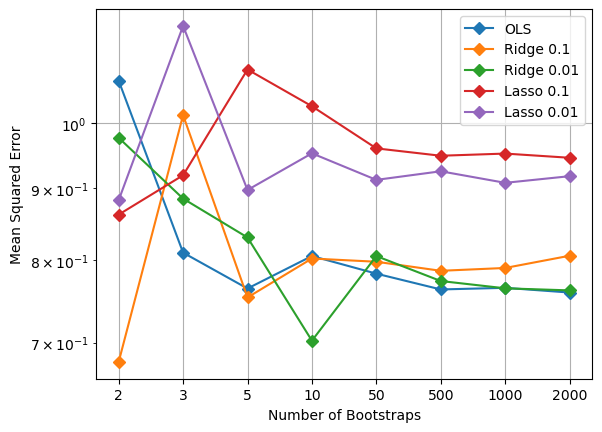

<Figure size 960x720 with 0 Axes>

In [64]:
n_bootstraps = [2, 3, 5, 10, N_POINTS, 500, 1_000, 2_000]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

def bootstrap(optimization_method, name):

    error = []

    for i, n in enumerate(n_bootstraps):
        y_pred = empty((y_test.shape[0], n))
        for j in range(n):
            x_, y_ = resample(x_train, y_train)

            X = pol.fit_transform(x_.reshape(-1, 1))

            # print(i, n, j)
            y_pred[:, j] = optimization_method.fit(X, y_).predict(pol.transform(x_test.reshape(-1, 1))).ravel()

        # error.append(mean( mean((y_test - y_pred)**2, axis=1, keepdims=True) ))
        error.append(mean_squared_error(y_test, y_pred.mean(axis=1)))

        print(f"{n} Bootstraps {error[i]:.4f}", end="   ")
    
    print()
    scalar = StandardScaler()
    X = pol.fit_transform(x.reshape(-1, 1))
    X = scalar.fit_transform(X)
    y_center = y - y.mean()

    reg = optimization_method.fit(X, y_center)
    y_pred = reg.predict(scalar.transform(pol.transform(x.reshape(-1, 1)))) + y.mean()

    plt.plot(range(len(n_bootstraps)), error, 'D-', label=name)

for optimization_method, name in [
        (LinearRegression(), "OLS"),
        (Ridge(alpha=0.1), "Ridge 0.1"),
        (Ridge(alpha=0.01), "Ridge 0.01"),
        (Lasso(alpha=0.1), "Lasso 0.1"),
        (Lasso(alpha=0.01), "Lasso 0.01")
    ]:
    bootstrap(optimization_method, name)

plt.xticks(range(len(n_bootstraps)), n_bootstraps)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Bootstraps')
plt.legend()
plt.yscale('log')
plt.grid()
plt.figure(dpi=150)
plt.show()